# Clustering Model...

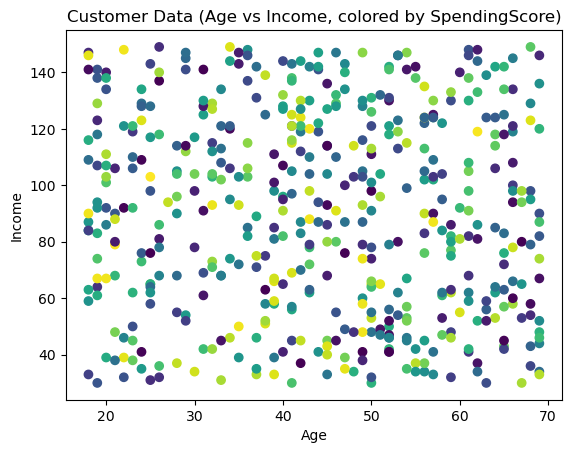

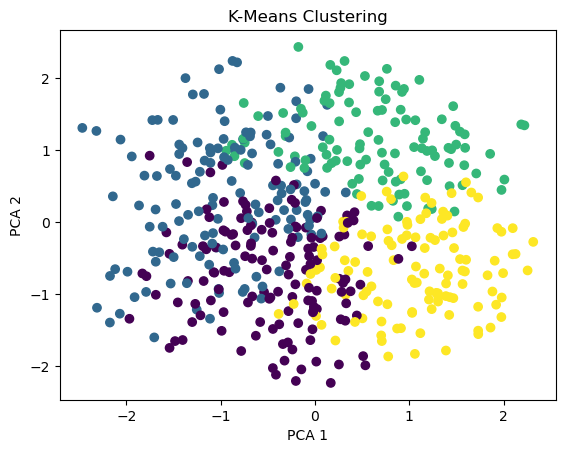

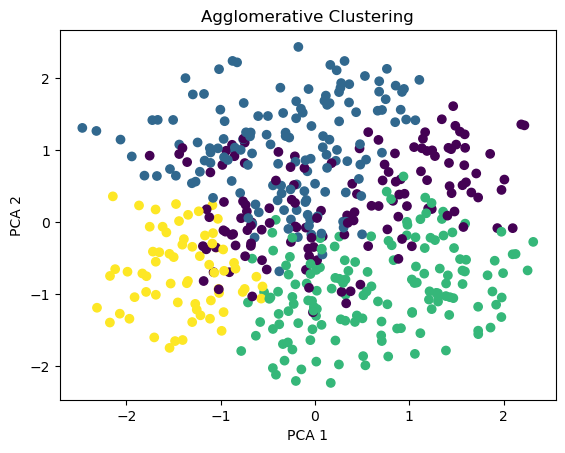

Best DBSCAN Parameters: {'eps': 0.6, 'min_samples': 5}


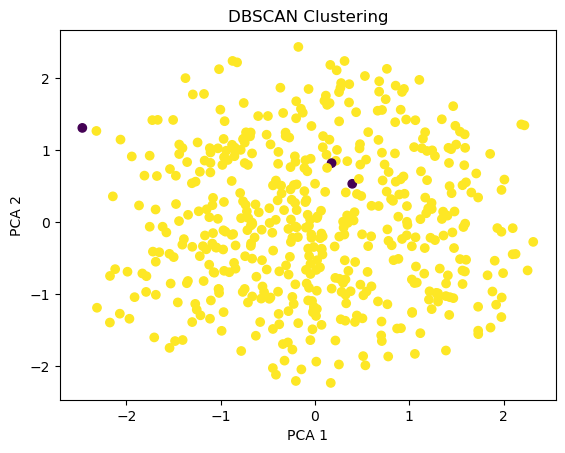

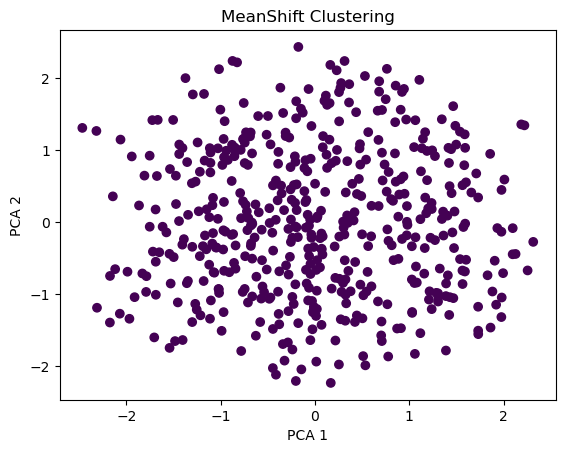

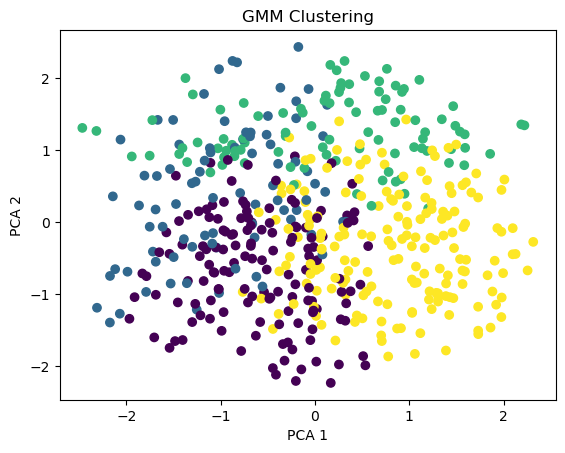

{'KMeans': {'Silhouette': 0.2640351743926331, 'Calinski-Harabasz': 191.78872962535462, 'Davies-Bouldin': 1.1464377320497732}}
{'Agglomerative': {'Silhouette': 0.22583912012422508, 'Calinski-Harabasz': 157.21857325655273, 'Davies-Bouldin': 1.3177292417952513}}
{'DBSCAN': {'Silhouette': 0.18367266869881324, 'Calinski-Harabasz': 4.167799869292584, 'Davies-Bouldin': 1.5122496795101041}}
MeanShift: Not enough clusters for evaluation.
{'GMM': {'Silhouette': 0.22117025662806758, 'Calinski-Harabasz': 153.7461502364524, 'Davies-Bouldin': 1.2260495493863899}}

KMeans Cluster Profile:
               Age      Income  SpendingScore
Cluster                                      
0        49.897810  127.678832      42.941606
1        25.705882   93.022059      49.044118
2        49.763636   67.309091      80.936364
3        53.880342   62.324786      23.111111


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from itertools import product
from mpl_toolkits.mplot3d import Axes3D

# Simulate customer data
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(18, 70, 500),
    'Income': np.random.randint(30, 150, 500),
    'SpendingScore': np.random.randint(1, 100, 500)
})

# Visualize original data
plt.scatter(df['Age'], df['Income'], c=df['SpendingScore'], cmap='viridis')
plt.title("Customer Data (Age vs Income, colored by SpendingScore)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# Scaling and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# DBSCAN with manual parameter tuning
best_score = -1
best_labels = None
best_params = {}

for eps, min_samples in product([0.3, 0.4, 0.5, 0.6], [5, 10, 15]):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
        try:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_labels = labels
                best_params = {'eps': eps, 'min_samples': min_samples}
        except:
            continue

print("Best DBSCAN Parameters:", best_params)
dbscan_labels = best_labels

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Mean Shift Clustering
meanshift = MeanShift()
mean_labels = meanshift.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mean_labels, cmap='viridis')
plt.title("MeanShift Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title("GMM Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Evaluation Function
def evaluate_clustering(X, labels, name):
    if len(set(labels)) <= 1:
        return f"{name}: Not enough clusters for evaluation."
    return {
        name: {
            'Silhouette': silhouette_score(X, labels),
            'Calinski-Harabasz': calinski_harabasz_score(X, labels),
            'Davies-Bouldin': davies_bouldin_score(X, labels)
        }
    }

# Print Evaluation Scores
print(evaluate_clustering(X_scaled, kmeans_labels, "KMeans"))
print(evaluate_clustering(X_scaled, agglo_labels, "Agglomerative"))
print(evaluate_clustering(X_scaled, dbscan_labels, "DBSCAN"))
print(evaluate_clustering(X_scaled, mean_labels, "MeanShift"))
print(evaluate_clustering(X_scaled, gmm_labels, "GMM"))

# Cluster profiling for KMeans
df['Cluster'] = kmeans_labels
print("\nKMeans Cluster Profile:")
print(df.groupby('Cluster').mean())
 